### MCMC contour plot
### True mass vs recovered mass

In [1]:
# Loading saved files
import emcee
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

burnin = 1000
readerfile0 = "/pscratch/sd/t/titus/MiniUchuu/mcmc_results/newdata_sigboosts_mh_no_h1z_all_old_prior_setup_changed_bov_Fig9_mcmc_results_l3_z0.h5" #MCMC for 1st richness bin
# readerfile0 = "/pscratch/sd/t/titus/MiniUchuu/mcmc_results/newdata_sigboosts_mh_no_h1z_all_old_prior_setup_changed_bov_Fig9_mcmc_results_l4_z0.h5" #MCMC for 2nd richness bin
# readerfile0 = "/pscratch/sd/t/titus/MiniUchuu/mcmc_results/newdata_sigboosts_mh_no_h1z_all_old_prior_setup_changed_bov_Fig9_mcmc_results_l5_z0.h5" #MCMC for 3rd richness bin
# readerfile0 = "/pscratch/sd/t/titus/MiniUchuu/mcmc_results/newdata_sigboosts_mh_no_h1z_all_old_prior_setup_changed_bov_Fig9_mcmc_results_l6_z0.h5" #MCMC for 4th richness bin

reader = emcee.backends.HDFBackend(readerfile0)
samples0 = reader.get_chain()
flat_samples0 = reader.get_chain(discard=burnin, flat=True)

lnprob = reader.get_log_prob(discard=burnin, flat=True)
# print(len(flat_samples0))
# print(len(lnprob))
best_fit_params  = flat_samples0[np.argmax(lnprob)]
best_fit_params


array([14.29649618,  5.52332613,  0.3306857 ,  0.45008555,  0.17248043,
        0.25096722,  1.01841748])

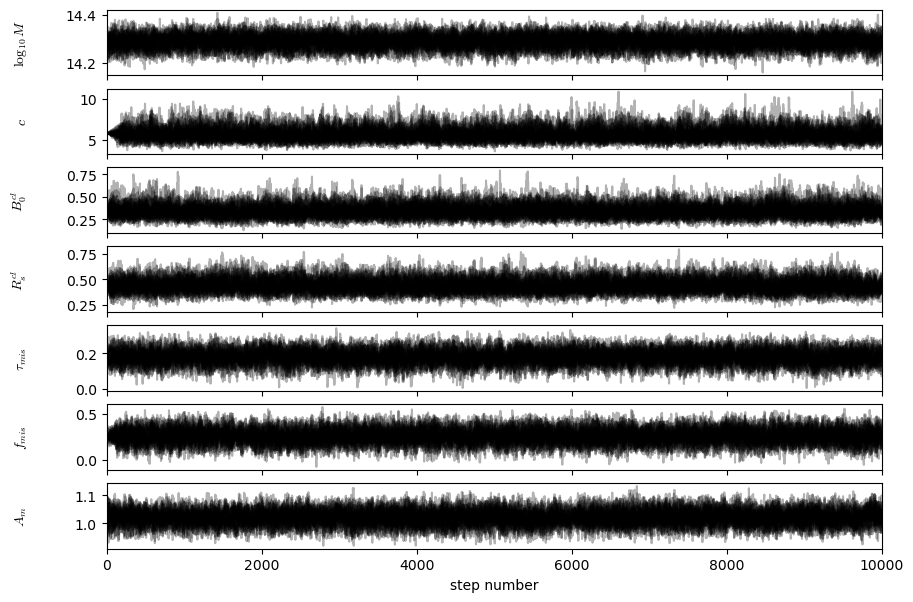

In [2]:
import corner
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'cm'

fig, axes = plt.subplots(7, figsize=(10, 7), sharex=True)
# samples = sampler.get_chain()
labels2 = [r"$\log_{10}M$", "$c$", r"$B^{cl}_0$", r"$R^{cl}_s$", r"$\tau_{mis}$", r"$f_{mis}$", "$A_m$"]
names = ["M", "c", "B", "Rs", "tau", "fmis", "Am"]
# labels2 = [r"log10M", "c", r"B0", r"Rs", r"tau", r"fmis", "Am"]
for i in range(7):
    ax = axes[i]
    ax.plot(samples0[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples0))
    ax.set_ylabel(labels2[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [3]:
## Final (changed covariance)
mean_mass_true_arr = [1.971057e+14, 2.865907e+14, 4.064710e+14, 6.429285e+14] #True mass
true_params = np.array([np.log10(mean_mass_true_arr[0]), 5.81, 0.34, 0.44, 0.17, 0.25, 1.021]) #l3_z0 True params for 1st richness bin
# true_params = np.array([np.log10(mean_mass_true_arr[1]), 4.53, 0.37, 0.5, 0.17, 0.25, 1.021]) #l4_z0 True params for 2nd richness bin
# true_params = np.array([np.log10(mean_mass_true_arr[2]), 4.38, 0.27, 0.8, 0.17, 0.25, 1.021]) #l5_z0 True params for 3rd richness bin
# true_params = np.array([np.log10(mean_mass_true_arr[3]), 4.65, 0.23, 1.37, 0.17, 0.25, 1.021]) #l6_z0 True params for 4th richness bin

print(np.log10(mean_mass_true_arr))

[14.29469918 14.45726209 14.60902957 14.80816268]


In [4]:
# from getdist import plots, MCSamples
# # %matplotlib inline

# labels2 = [r"\log_{10}M", r"c_{\rm 200m}", r"B^{cl}_0", r"R^{cl}_s", r"\tau_{\rm mis}", r"f_{\rm mis}", "A_m"]
# names = ["M", "c", "B", "Rs", "tau", "fmis", "Am"]
# # samples_mcmc=MCSamples(samples=flat_samples, ignore_rows = 0.1, names = names, labels = labels2)
# samples_mcmc=MCSamples(samples=flat_samples0, ignore_rows = 0.1, names = names, labels = labels2, 
#                       settings={'smooth_scale_2D':0.25, 'smooth_scale_1D':0.3})
# samples_mcmc.updateSettings({'contours': [0.6827, 0.9545, 0.9973]})

# g = plots.get_subplot_plotter()
# g.settings.axes_fontsize=25
# g.settings.axes_labelsize=30
# g.settings.num_plot_contours = 3
# g.triangle_plot([samples_mcmc], ["M", "c", "tau", "fmis", "Am", "B", "Rs"], filled=True, 
#                analysis_settings={'contours':[0.68, 0.95, 0.99]}, title_limit = 1)
# # plt.show()

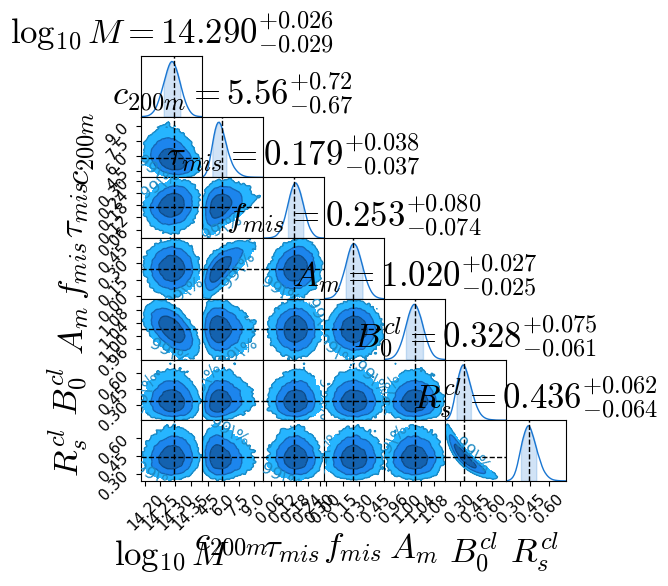

In [5]:
from chainconsumer import ChainConsumer
# %matplotlib inline

# log10_M, c, tau, fmis, Am, B0, Rs 
new_flat_samples = np.stack([flat_samples0[:,0], flat_samples0[:,1], 
                             flat_samples0[:,4], flat_samples0[:,5], 
                             flat_samples0[:,6], flat_samples0[:,2], 
                             flat_samples0[:,3]], axis = 1)

# If you pass in parameter labels and only one chain, you can also get parameter bounds
labels21 = [r"$\log_{10}M$", "$c_{200m}$", r"$\tau_{mis}$", r"$f_{mis}$", "$A_m$", r"$B^{cl}_0$", r"$R^{cl}_s$"]
c = ChainConsumer()
true_params2 = np.array([true_params[0], true_params[1], 
                         true_params[4], true_params[5], 
                         true_params[6], true_params[2], 
                         true_params[3]]) 
c.add_chain(new_flat_samples, parameters=labels21)
c.configure(summary=True, spacing=0.0, diagonal_tick_labels=True, 
            tick_font_size=11, label_font_size=25, max_ticks=5, 
            shade_gradient=[0.75], colors=['blue'], sigma2d=False,
            # sigmas=[1, 2, 3], shade_alpha=1.0, smooth = 30, #smooth = True,  #kde = True,
            sigmas=[1, 2, 3], shade_alpha=1.0, smooth = True,  #kde = True,
            summary_area=0.6827, contour_labels = "confidence", 
            contour_label_font_size = 12, flip=True, bar_shade=True)
c.configure_truth(color='k', ls="--", alpha=1.0)
# c.analysis.get_summary(parameters=labels2)
fig = c.plotter.plot(display=True, figsize="column", truth=true_params2)

fig.set_size_inches(11 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

In [6]:
##newdata, true_mass*h
mean_mass_true_arr = [1.971057e+14, 2.865907e+14, 4.064710e+14, 6.429285e+14] ##newdata, true_mass*h
l3_z0 = 1.971057e+14 #True mass for 1st richness bin
l4_z0 = 2.865907e+14 #True mass for 2nd richness bin
l5_z0 = 4.064710e+14 #True mass for 3rd richness bin
l6_z0 = 6.429285e+14 #True mass for 4th richness bin

readerfile_l3_z0 = "newdata_sigboosts_mh_no_h1z_all_old_prior_setup_changed_bov_Fig9_mcmc_results_l3_z0.h5" #MCMC for 1st richness bin
readerfile_l4_z0 = "newdata_sigboosts_mh_no_h1z_all_old_prior_setup_changed_bov_Fig9_mcmc_results_l4_z0.h5" #MCMC for 2nd richness bin
readerfile_l5_z0 = "newdata_sigboosts_mh_no_h1z_all_old_prior_setup_changed_bov_Fig9_mcmc_results_l5_z0.h5" #MCMC for 3rd richness bin
readerfile_l6_z0 = "newdata_sigboosts_mh_no_h1z_all_old_prior_setup_changed_bov_Fig9_mcmc_results_l6_z0.h5" #MCMC for 4th richness bin

filepath = "/pscratch/sd/t/titus/MiniUchuu/mcmc_results/"
def read_mcmc(readerfile, M_true, filepath = None, burnin = 100, param_type = "means"):
    if filepath is not None:
        reader = emcee.backends.HDFBackend(filepath+readerfile)
    else:
        reader = emcee.backends.HDFBackend(readerfile)
    samples = reader.get_chain()
    flat_samples = reader.get_chain(discard=burnin, flat=True)#[:,0]
    lnprob = reader.get_log_prob(discard=burnin, flat=True)
    uncertainty = np.std(flat_samples[:,0])
    h = 0.6774 
    if param_type == "bestfit":
        best_fit_params  = flat_samples[np.argmax(lnprob)] #best fit parameters
        M_obs = best_fit_params[0]
        C = (M_true)/(10**M_obs)
        return C, M_obs, uncertainty, best_fit_params#, bar0, np.array(flat_samples).std()
    elif param_type == "means":
        posterior_means = np.mean(flat_samples, axis=0) #posterior mean
        M_obs = posterior_means[0]
        C = (M_true)/(10**M_obs)
        return C, M_obs, uncertainty, posterior_means#, bar0, np.array(flat_samples).std()
    
param_type = "means" # use the posterior means
# param_type = "bestfit" #use the best-fit parameters
C_l3_z0, aa, std_l3_z0, posterior_means_l3_z0 = read_mcmc(readerfile = readerfile_l3_z0, M_true = l3_z0, filepath = filepath, param_type = param_type)
C_l4_z0, bb, std_l4_z0, posterior_means_l4_z0 = read_mcmc(readerfile = readerfile_l4_z0, M_true = l4_z0, filepath = filepath, param_type = param_type)
C_l5_z0, cc, std_l5_z0, posterior_means_l5_z0 = read_mcmc(readerfile = readerfile_l5_z0, M_true = l5_z0, filepath = filepath, param_type = param_type)
C_l6_z0, dd, std_l6_z0, posterior_means_l6_z0 = read_mcmc(readerfile = readerfile_l6_z0, M_true = l6_z0, filepath = filepath, param_type = param_type)

C_z0 = np.array([C_l3_z0, C_l4_z0, C_l5_z0, C_l6_z0])
std_arr = np.array([std_l3_z0, std_l4_z0, std_l5_z0, std_l6_z0])
print(C_z0)
print(std_arr)
Mobs = np.array([aa, bb, cc, dd])
Mobs
# posterior_means_l3_z0

[1.01524194 1.02166493 1.00466061 1.04364787]
[0.02715088 0.02743035 0.03615195 0.03670088]


array([14.28812963, 14.44795361, 14.60701019, 14.78960869])

In [7]:
print(np.log10(l3_z0), np.log10(l4_z0), np.log10(l5_z0), np.log10(l6_z0))
print(C_z0)
print(std_arr)

14.294699183603406 14.457262093234341 14.609029565946697 14.808162677773305
[1.01524194 1.02166493 1.00466061 1.04364787]
[0.02715088 0.02743035 0.03615195 0.03670088]


### True vs recovered mass

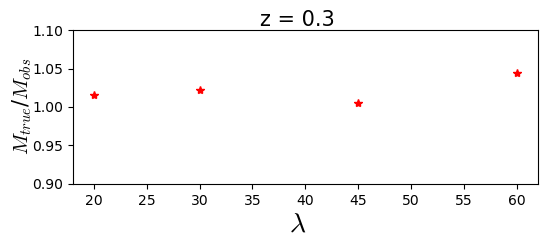

In [8]:
B = [20, 30, 45, 60] #lower edge of richness bins
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(6, 2), sharex=True, sharey=True)
ax.plot(B, C_z0, "*r")
ax.set_ylim(0.9,1.10)
fig.supxlabel('$\lambda$', x = 0.5, y = -0.09, va='center', ha='center', fontsize=20)
fig.supylabel('$M_{true}$/$M_{obs}$', x = 0.04, y = 0.5, va='center', ha='center', fontsize=15)
fig.suptitle('z = 0.3', fontsize = 15)
plt.show()

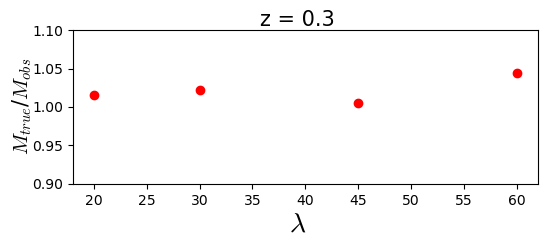

In [9]:
B = [20, 30, 45, 60] #lower edge of richness bins
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(6, 2), sharex=True, sharey=True)
ax.set_ylim(0.9,1.1)
ax.plot(B, C_z0, "or")
fig.supxlabel('$\lambda$', x = 0.5, y = -0.09, va='center', ha='center', fontsize=20)
fig.supylabel('$M_{true}$/$M_{obs}$', x = 0.04, y = 0.5, va='center', ha='center', fontsize=15)
fig.suptitle('z = 0.3', fontsize = 15)
plt.show()

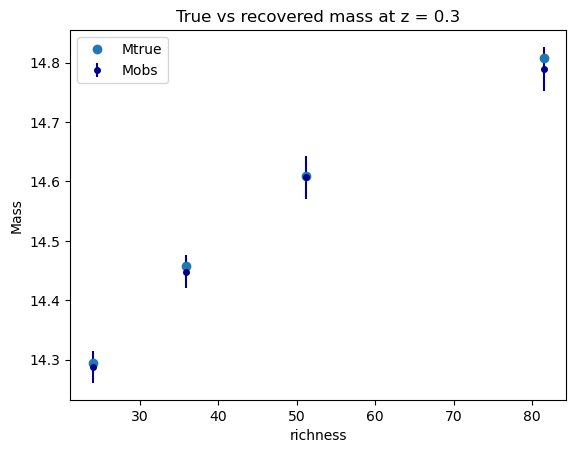

In [10]:
mean_masses_true = [np.log10(l3_z0), np.log10(l4_z0), np.log10(l5_z0), np.log10(l6_z0)] 
x = [23.99617, 35.86541, 51.21334, 81.45424] #mean values of the richness bins
# plt.loglog()
plt.errorbar(x, Mobs, yerr = std_arr, 
             fmt = 'o', ms = 4.0, color = 'darkblue', 
             label = "Mobs")
plt.plot(x, mean_masses_true, "o", label = "Mtrue")
plt.title("True vs recovered mass at z = 0.3")
plt.xlabel("richness")
plt.ylabel("Mass")
plt.legend()
plt.show()

### Plotting data vs best-ft model (or posterior mean)

#### Delta Sigma

In [11]:
#--------------- Packages ---------------#
%load_ext autoreload
%autoreload 2
import torch
import Corrfunc
import numpy as np
from sbi import utils
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from sbi.inference.base import infer
from colossus.cosmology import cosmology
from scipy.stats import norm, multivariate_normal
from colossus.halo import concentration, profile_nfw, profile_composite
plt.style.use("CustomizingPlots")
%matplotlib inline

/global/homes/t/titus/.conda/envs/mass_cal/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
from classy import Class
import cluster_toolkit as ctk
from colossus.cosmology import cosmology
from scipy.stats import norm#, multivariate_normal

# Set colossus cosmology
cosmo_params = {'flat': True, 'H0': 67.74, 'Om0': 0.3089, 'Ob0': 0.0486, 'sigma8': 0.8159, 'ns': 0.9667}
cosmology.addCosmology('MiniUchuu', cosmo_params)
cosmo = cosmology.setCosmology('MiniUchuu')
h = cosmo_params['H0']/100

#Start by specifying the cosmology
Omega_b = cosmo_params['Ob0']
Omega_m = cosmo_params['Om0']
Omega_cdm = Omega_m - Omega_b
sigma8 = cosmo_params['sigma8']
h = cosmo_params['H0']/100 # McClintock h value
A_s = 2.1e-9 #np.exp(3.064)/1e10 NB: ln(1e10*As)=3.064
n_s = cosmo_params['ns']
# z = 0.3

#Create a params dictionary
#Need to specify the max wavenumber
k_max = 1000 #UNITS: 1/Mpc

params = {
         'output':'mPk',
         'h':h,
         'sigma8':sigma8,
         'n_s':n_s,
         'Omega_b':Omega_b,
         'Omega_cdm':Omega_cdm,
         'P_k_max_1/Mpc':k_max,
         'z_max_pk':1.0, #Default value is 10
         'non linear':'halofit'
}

#Initialize the cosmology and compute everything
cosmo_ctk = Class()
cosmo_ctk.set(params)
cosmo_ctk.compute()

In [13]:
output_loc = '/global/u2/t/titus/Titus/Lensing/output/'
nbody_loc = '/global/u2/t/titus/Titus/Lensing/data/'
lensing_loc = '/global/u2/t/titus/Titus/Lensing/data/McClintock_data/desy1_tamas/'
filepath = "/global/u2/t/titus/Titus/Lensing/codes/notebooks/mcmc_results/"

# True data: dictionary of Delta Sigma profiles for all richness bins
saved_ds_profiles_dic = nbody_loc+"ds_profiles_newdata_mh_no_h1z_all_old_prior_setup_changed_bov_dic.npy" 

load_ds_profiles = np.load(saved_ds_profiles_dic, allow_pickle=True).item()
# ds = load_ds_profiles[lam_z_bin]
Sigma_crit_dic = {"l3_z0":2.558834359999999819e-04, "l4_z0":2.562248809999999950e-04, 
                  "l5_z0":2.559633569999999851e-04, "l6_z0":2.557816409999999962e-04, 
                  "l3_z1":2.631864830000000188e-04, "l4_z1":2.640424589999999859e-04, 
                  "l5_z1":2.630129280000000004e-04, "l6_z1":2.629873459999999808e-04, 
                  "l3_z2":2.376251149999999903e-04, "l4_z2":2.379116389999999873e-04, 
                  "l5_z2":2.372028870000000031e-04, "l6_z2":2.373956570000000036e-04}
posterior_means_dic = {"l3_z0":posterior_means_l3_z0, "l4_z0":posterior_means_l4_z0, 
                       "l5_z0":posterior_means_l5_z0, "l6_z0":posterior_means_l6_z0
                      }

z = 0.3

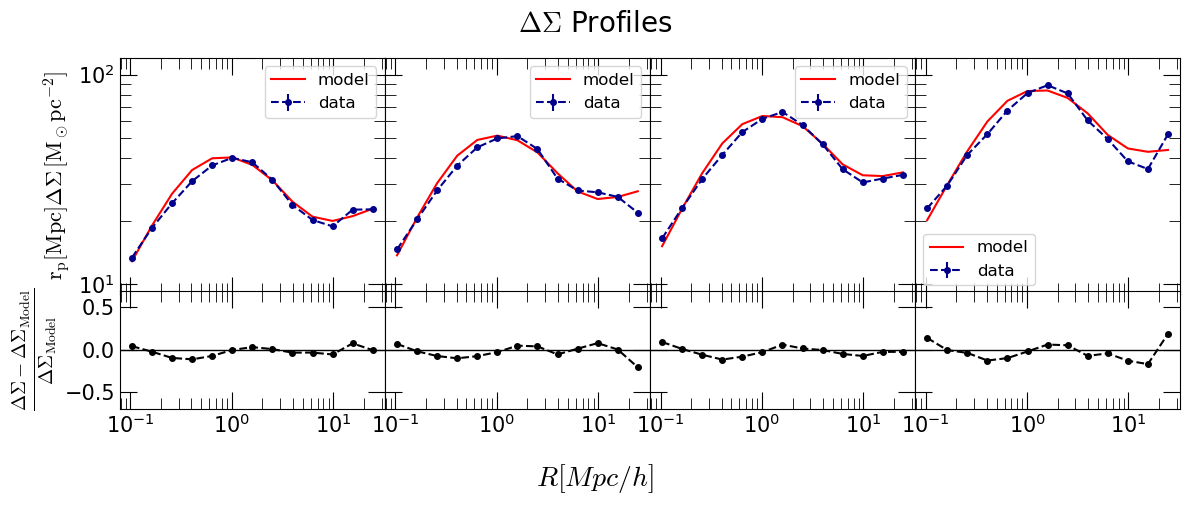

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cluster_toolkit as ctk

# Setup figure and gridspec
fig = plt.figure(figsize=(12, 5))
# gs = fig.add_gridspec(2, 4)  # 2 rows, 4 columns grid spec
gs = fig.add_gridspec(2, 4, height_ratios=[2, 1])  # For example, bottom panel is twice as tall as each top panel

# Create the first axis for the top row
axes_top = [fig.add_subplot(gs[0, 0])]
# Create remaining axes for the top row, sharing the y-axis with the first
for i in range(1, 4):
    axes_top.append(fig.add_subplot(gs[0, i], sharey=axes_top[0]))

# Create axes for the bottom row
axes_bottom = [fig.add_subplot(gs[1, i]) for i in range(4)]

lambdas = [23.99617, 35.86541, 51.21334, 81.45424]  # Example lambda values, adjust as necessary

for j, lam in enumerate(lambdas):
    lam_z_bin = "l"+str(j+3)+"_z0"
    
    Sigma_crit_inv0 = Sigma_crit_dic[lam_z_bin] #2.558834359999999819e-04 
    ds = load_ds_profiles[lam_z_bin]
    
    # mass, concentration, B0, Rs, tau (miscentering offset), fmis, Am.
    log10_M, c, B0, Rs, tau, fmis, Am = posterior_means_dic[lam_z_bin]
    M = 10**log10_M #Msun/h

    Rlam = (lam/100)**0.2 #Mpc/h comoving #cluster radius assigned by redmapper
    Rmis = tau*Rlam #Mpc/h Radial miscentering offset. Cluster centers are wrongly identified by a distance Rmis.
    Rproj = np.logspace(-2, 2.4, num=1000, base=10) #Mpc/h Projected 2D radii. 
    R3d = np.logspace(-2, 3, num=1000, base=10) #Mpc/h comoving. 3D radii.

    # McClintock radial bins
    Rmin = 0.0323
    Rmax = 30
    nbins = 15

    Redges = np.logspace(np.log10(Rmin), np.log10(Rmax), nbins+1) #Projected radial bin edges
    rp = (Redges[:-1]+Redges[1:])/2

    """
    Note:
    Minimum Rproj for Sigma(Rproj) must be >= than min(r) of xi(r).
    Maximum Rproj for Sigma(Rproj) must be <= than max(r) of xi(r).
    Thus, the range of values for Rproj must be 
    equal to (or contained in) that of r
    """

    # Compute boost factors from cluster toolkit
    #Note: Rs is default in Mpc physical
    boost_model = ctk.boostfactors.boost_nfw_at_R(Rproj, B0, Rs*h*(1+z)) #theory

    #Specify k and z
    # k = np.logspace(-5, 3, num=4000) #Mpc^-1 comoving
    k = np.logspace(-5, np.log10(k_max), num=4000) #Mpc^-1 comoving
    # Power spectrum
    Pnonlin = np.array([cosmo_ctk.pk(ki, z) for ki in k])#*h**3  #Mpc^3/h^3 comoving
    Plin = np.array([cosmo_ctk.pk_lin(ki, z) for ki in k])#*h**3  #Mpc^3/h^3 comoving
    kh = k/h #h/Mpc comoving

    #P(k) are in Mpc^3/h^3 comoving
    #Thus, you will need to convert these to h/Mpc and (Mpc/h)^3 to use in the toolkit.
    Plin *= h**3
    Pnonlin *= h**3

    # NFW profile
    xi_nfw = ctk.xi.xi_nfw_at_r(R3d, M, c, Omega_m)

    # # Matter-matter correlation function (matter auto-correlation)
    xi_mm = ctk.xi.xi_mm_at_r(R3d, kh, Pnonlin)

    # 2-halo correlation function
    bias_term = ctk.bias.bias_at_M(M, kh, Plin, Omega_m) # Here, P must be linear.
    xi_2halo = ctk.xi.xi_2halo(bias_term, xi_mm)

    # Halo-matter correlation function
    xi_hm = ctk.xi.xi_hm(xi_nfw, xi_2halo)

    # Sigma (computed from xi_hm)
    Sigma = ctk.deltasigma.Sigma_at_R(Rproj, R3d, xi_hm, M, c, Omega_m) #Sigma

    # DeltaSigma (excess surface density)
    DS = ctk.deltasigma.DeltaSigma_at_R(Rproj, Rproj, Sigma, M, c, Omega_m) #DeltaSigma

    Sigma_mis  = ctk.miscentering.Sigma_mis_at_R(Rproj, Rproj, Sigma, M, c, Omega_m, Rmis, kernel="rayleigh") #miscentered Sigma profiles
    DS_mis = ctk.miscentering.DeltaSigma_mis_at_R(Rproj, Rproj, Sigma_mis) #miscentered Sigma profiles

    #full Sigma profile; i.e. miscentered + correctly centered Sigma profiles
    full_Sigma = (1-fmis)*Sigma + fmis*Sigma_mis 
    #full DeltaSigma profile; i.e. miscentered + correctly centered DeltaSigma profiles
    full_DS = (1-fmis)*DS + fmis*DS_mis 
    full_DS *= Am #multiplicative bias

    full_DS /= boost_model #de-boost the model
    # Sigma_crit_inv = Sigma_crit_dic[lam_z_bin]
    Sigma_crit_inv = Sigma_crit_inv0
    Sigma_crit_inv *= h*(1+z)**2
    full_DS /= (1-full_Sigma*Sigma_crit_inv) #Reduced shear
    #Here, DeltaSigma is in Msun h/pc^2 comoving

    ave_DS = ctk.averaging.average_profile_in_bins(Redges, Rproj, full_DS)
    frac_diff_ds = (ds-ave_DS)/ave_DS
    
    # print(ds)
    # print(ave_DS, "\n")
    inds = (rp > 0.1)*(rp < 999) 
    # inds = rp > 0.0
    rp1 = rp[inds]

    label = "data"
    
    if j == 0:
        axes_top[j].set_ylabel(r"$\rm r_p[Mpc]\Delta\Sigma\,[M_\odot \mathrm{pc}^{-2}]$", fontsize=16)  # Set Y-label for the first column
        axes_bottom[j].set_ylabel(r"$\rm \frac{\Delta\Sigma - \Delta\Sigma_{Model}}{\Delta\Sigma_{Model}}$", fontsize=20)  # Set Y-label for the first column
    # axes_top[j].set_ylim(1.0, 1e2)
    axes_top[j].set_ylim(9.0, 1.2e2)
    axes_top[j].loglog()
    axes_top[j].errorbar(rp1, rp1*ds[inds], yerr = np.zeros(len(rp1)), fmt = '--o', 
                         ms = 4.0, color = 'darkblue', 
                         label = label)
    axes_top[j].plot(rp1, rp1*ave_DS[inds], "-r", label = "model")
    axes_top[j].legend()
    axes_bottom[j].set_xscale('log')
    axes_bottom[j].set_ylim(-0.7, 0.7)
    axes_bottom[j].plot(rp1, frac_diff_ds[inds], '--o', ms = 4.0, color = 'k')
    axes_bottom[j].axhline(y=0.0, color='k', linestyle='-', lw = 1)

# To avoid label clutter, hide y-tick labels for the top row axes except for the first one
for ax in axes_top[1:]:
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_xticklabels(), visible=False)
    # ax.set_yticklabels([])
    
for ax in axes_top:
    plt.setp(ax.get_xticklabels(), visible=False)
    
for ax in axes_bottom[1:]:
    plt.setp(ax.get_yticklabels(), visible=False)
    # ax.set_yticklabels([])

# Adjust layout and set a super title
plt.tight_layout()
fig.suptitle(r'$\Delta\Sigma$ Profiles', fontsize=20)
fig.supxlabel('$R [Mpc/h]$', fontsize=20)
plt.tight_layout(h_pad = -0.4, w_pad = -1.05)
plt.show()

#### Boost factors

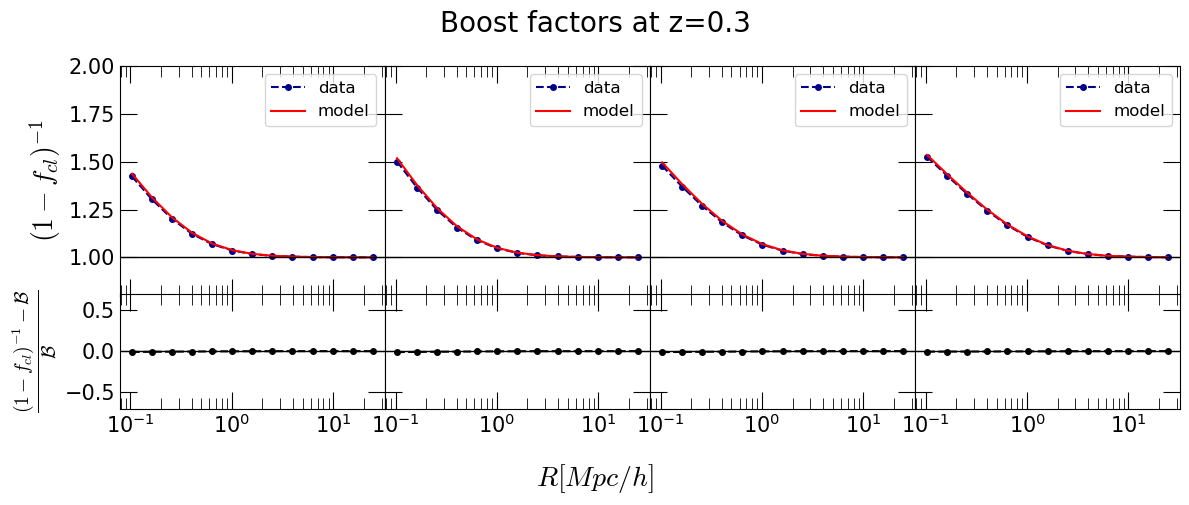

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cluster_toolkit as ctk


# saved_boost_profiles_dic = nbody_loc+"saved_boost_profiles_dic.npy"
saved_boost_profiles_dic = nbody_loc+"boost_profiles_newdata_mh_no_h1z_all_old_prior_setup_changed_bov_dic.npy"
load_boost_profiles = np.load(saved_boost_profiles_dic, allow_pickle=True).item()

# Setup figure and gridspec
fig = plt.figure(figsize=(12, 5))
# gs = fig.add_gridspec(2, 4)  # 2 rows, 4 columns grid spec
gs = fig.add_gridspec(2, 4, height_ratios=[2, 1])  # For example, bottom panel is twice as tall as each top panel

# Create the first axis for the top row
axes_top = [fig.add_subplot(gs[0, 0])]
# Create remaining axes for the top row, sharing the y-axis with the first
for i in range(1, 4):
    axes_top.append(fig.add_subplot(gs[0, i], sharey=axes_top[0]))

# Create axes for the bottom row
axes_bottom = [fig.add_subplot(gs[1, i]) for i in range(4)]

for j in range(4):
    # Assuming 'posterior_means_dic' and 'load_boost_profiles' are defined
    lam_z_bin = "l" + str(j + 3) + "_z0"
    log10_M, c, B0, Rs, tau, fmis, Am = posterior_means_dic[lam_z_bin]

    boost_data = load_boost_profiles[lam_z_bin]
    Redges = np.logspace(np.log10(Rmin), np.log10(Rmax), nbins + 1)
    Rb = (Redges[:-1] + Redges[1:]) / 2

    boost_theory = ctk.boostfactors.boost_nfw_at_R(Rb, B0, Rs)
    frac_diff_B = (boost_data - boost_theory)/boost_data

    sel = (Rb > 0.1)*(rp < 999)
    label = "data"
    # label = "Lambda = {}".format(lam)
    
    if j == 0:
        axes_top[j].set_ylabel('$(1-f_{cl})^{-1}$', fontsize=20)  # Set Y-label for the first column
        axes_bottom[j].set_ylabel(r"$\frac{(1-f_{cl})^{-1} - \mathcal{B}}{\mathcal{B}}$", fontsize=20)  # Set Y-label for the first column
    axes_top[j].set_ylim(0.8, 2)
    axes_top[j].set_xscale('log')
    axes_top[j].plot(Rb[sel], boost_data[sel], '--o', ms=4.0, color='darkblue', label=label)
    axes_top[j].plot(Rb[sel], boost_theory[sel], "-r", label="model")
    axes_top[j].axhline(y=1.0, color='k', linestyle='-', lw = 1)
    axes_top[j].legend()
    axes_bottom[j].set_xscale('log')
    axes_bottom[j].set_ylim(-0.7, 0.7)
    axes_bottom[j].plot(Rb[sel], frac_diff_B[sel], '--o', ms = 4.0, color = 'k')
    axes_bottom[j].axhline(y=0.0, color='k', linestyle='-', lw = 1)

# # Set labels and scales as necessary
# for j, ax in enumerate(axes_top):
#     # ax.set_xscale('log')
#     if j == 0:
#         ax.set_ylabel('$(1-f_{cl})^{-1}$', fontsize=15)  # Set Y-label for the first column
        
# # Set labels and scales as necessary
# for j, ax in enumerate(axes_bottom):
#     # ax.set_xscale('log')
#     if j == 0:
#         ax.set_ylabel(r"$\frac{(1-f_{cl})^{-1} - \mathcal{B}}{\mathcal{B}}$", fontsize=15)  # Set Y-label for the first column

# To avoid label clutter, hide y-tick labels for the top row axes except for the first one
for ax in axes_top[1:]:
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_xticklabels(), visible=False)
    # ax.set_yticklabels([])
    
for ax in axes_top:
    plt.setp(ax.get_xticklabels(), visible=False)
    
for ax in axes_bottom[1:]:
    plt.setp(ax.get_yticklabels(), visible=False)
    # ax.set_yticklabels([])

# Adjust layout and set a super title
plt.tight_layout()
fig.suptitle('Boost factors at z=0.3', fontsize=20)
fig.supxlabel('$R [Mpc/h]$', fontsize=20)
plt.tight_layout(h_pad = -1.0, w_pad = -1.05)
plt.show()